## Different imports and setup

In [1]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf

In [3]:
from Tools import Plot
from Tools import Custom_models
from Tools import Helpers

## Set the seeds and extract the testing set

In [4]:
# Set the seed for reproducibility
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed*2)

In [5]:
_, _, features_test, labels_test = Helpers.Load_and_split_1D('Data/tanh.txt', seed, ratio=0.9)

## Load a model

In [6]:
model_name = 'Saved_models/Dense_2_layer_1stlayer_non_trainable'
model = keras.models.load_model(model_name)

## Assess the performance of the model on the testing set

In [7]:
mse = Helpers.MSE(model, features_test, labels_test)
mae = Helpers.MAE(model, features_test, labels_test)
print(f'The MSE is : {mse:.4e}. The MSE for the exact FEM weights is : 4.6153e-05')
print(f'The MAE is : {mae:.4e}. The MAE for the exact FEM weights is : 1.7933e-03')

The MSE is : 2.3338e-05. The MSE for the exact FEM weights is : 4.6153e-05
The MAE is : 2.0997e-03. The MAE for the exact FEM weights is : 1.7933e-03


2021-10-20 17:38:00.628071: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-20 17:38:00.628229: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## Print a summary of the loaded model

In [8]:
model.summary()

Model: "Dense_2_layer_1stlayer_non_trainable"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               multiple                  200       
_________________________________________________________________
dense2 (Dense)               multiple                  9898      
_________________________________________________________________
dense3 (Dense)               multiple                  99        
Total params: 10,197
Trainable params: 9,997
Non-trainable params: 200
_________________________________________________________________


## Extract layers and weights of the model

In [9]:
layer1 = model.get_layer(name='dense1')
layer2 = model.get_layer(name='dense2')
layer3 = model.get_layer(name='dense3')

In [10]:
weights1 = layer1.get_weights()
weights2 = layer2.get_weights()
weights3 = layer3.get_weights()

In [11]:
core1 = weights1[0].flatten()
bias1 = weights1[1].flatten()
core2 = weights2[0].flatten()
bias2 = weights2[1].flatten()
core3 = weights3[0].flatten()
bias3 = weights3[1].flatten()

## Compute the basis functions created by the model

In [12]:
# Computes the interval on which evaluate the basis functions and the real solution
x = np.linspace(0, 1, 1000)
y = 1/2*(1 + np.tanh(100*(x-1/3))) - 1/2*(1 + np.tanh(100*(x-2/3)))

In [13]:
# First layer basis functions
basis_func_layer1 = Helpers.basis_functions_first_layer(x, layer1)

In [14]:
# Second layer basis functions
second_layer_is_conv = False

basis_func_layer2 = Helpers.basis_functions_second_layer(x, layer1, layer2, conv=second_layer_is_conv)

## Visualize the basis functions

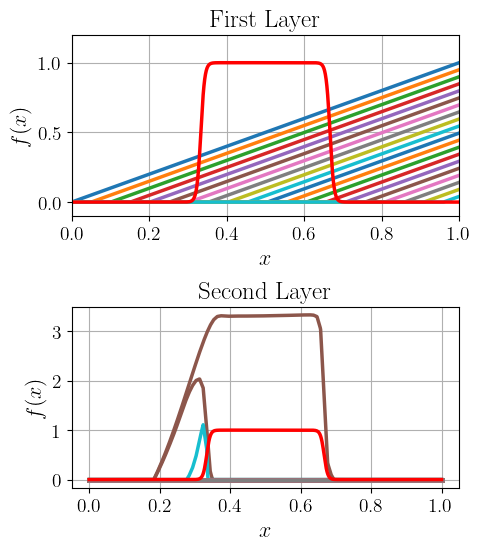

In [23]:
filename = 'Figures/1D_Relu_functions/1D_2_layers_non_trainable.pdf'
save = False

# Set to false to see only basis functions on the first layer
visualize_both = True
# To visualize only one function each offset values
offset1 = 5
offset2 = 1

if (visualize_both):
    fig, axs = plt.subplots(nrows=2, figsize=[5, 6])
    plt.subplots_adjust(hspace=0.5)

    for i in range(0, len(basis_func_layer1), offset1):
        axs[0].plot(x, basis_func_layer1[i,:])
    axs[0].plot(x, y, 'r-')
    axs[0].set(title='First Layer', xlabel='$x$', ylabel='$f(x)$')
    axs[0].set(xlim=[0,1], ylim=[-0.1, 1.2])
    axs[0].grid()

    for i in range(0, len(basis_func_layer2), offset2):
        axs[1].plot(x, basis_func_layer2[i,:])
    axs[1].plot(x, y, 'r-')
    axs[1].set(title='Second Layer', xlabel='$x$', ylabel='$f(x)$')
    #axs[1].set(xlim=[0,1], ylim=[-0.1, 2])
    axs[1].grid()

    if (save):
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

else:
    plt.figure()
    for i in range(0, len(basis_func_layer1), offset):
        plt.plot(x, basis_func_layer1[i,:])
    plt.plot(x, y, 'r-')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.xlim([0,1])
    plt.ylim([-0.1, 2])
    plt.grid()
    if save:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

## Inspect raw weights

In [16]:
print(bias2)

[-0.02956242]


In [18]:
print(core2)

[-4.860951  10.157145  -5.0129123]


In [12]:
-bias1/core1 < 1

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True])